In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container{max-width:80%!important;width:auto!important;}</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%reload_ext autoreload
%autoreload 2
%matplotlib inline

from tqdm.notebook import trange, tqdm

import cv2
import numpy as np
import matplotlib.pyplot as plt
from functools import partial

from pathlib import Path
colour = Path('../GTA_images/Simple/Colour')
depth = Path('../GTA_images/Simple/Depth')

import sys
sys.path.append('../')

from depth_Functions import (
    import_raw_colour_image, 
    import_raw_depth_image, 
    show_img,
    show_array_of_images,
    show_function
)

from Feature_Extraction import (
    create_local_feature_vector
)

from Feature_array import Feature_array

from Laplacian import Laplacian

In [2]:
colour_images = [import_raw_colour_image(str(file)) for file in sorted(colour.iterdir())]
depth_images = [import_raw_depth_image(str(file)) for file in sorted(depth.iterdir())]

In [3]:
train_images = colour_images[:-1]
train_labels = depth_images[:-1]
test_image = colour_images[-1]
test_labels = depth_images[-1]

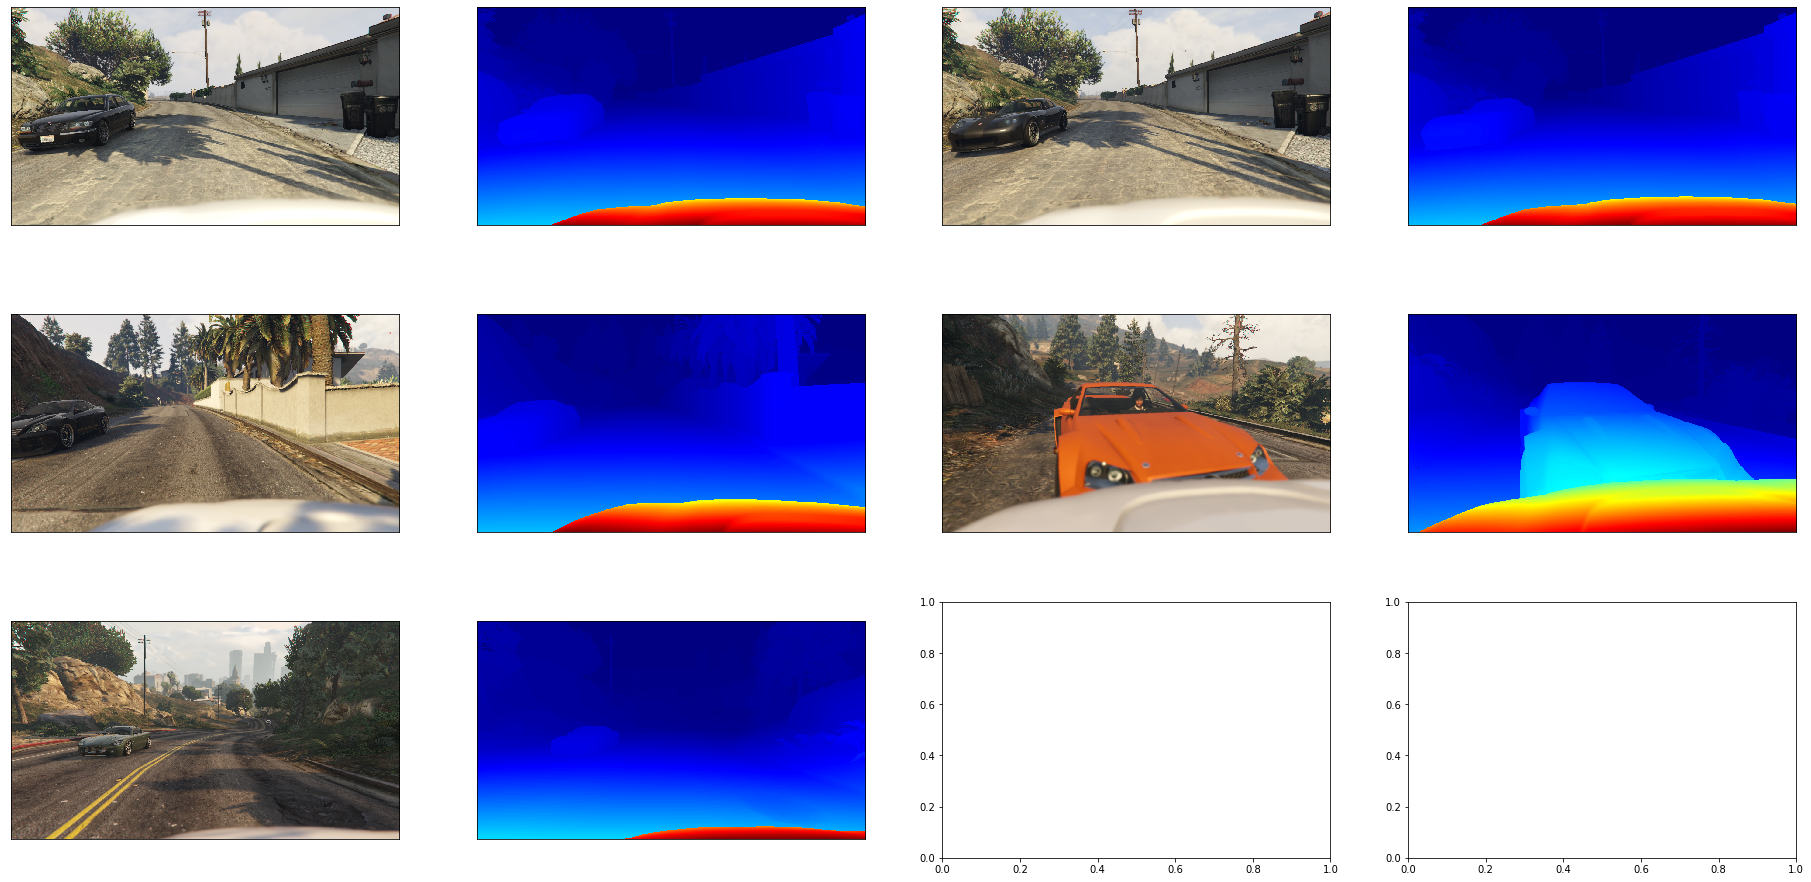

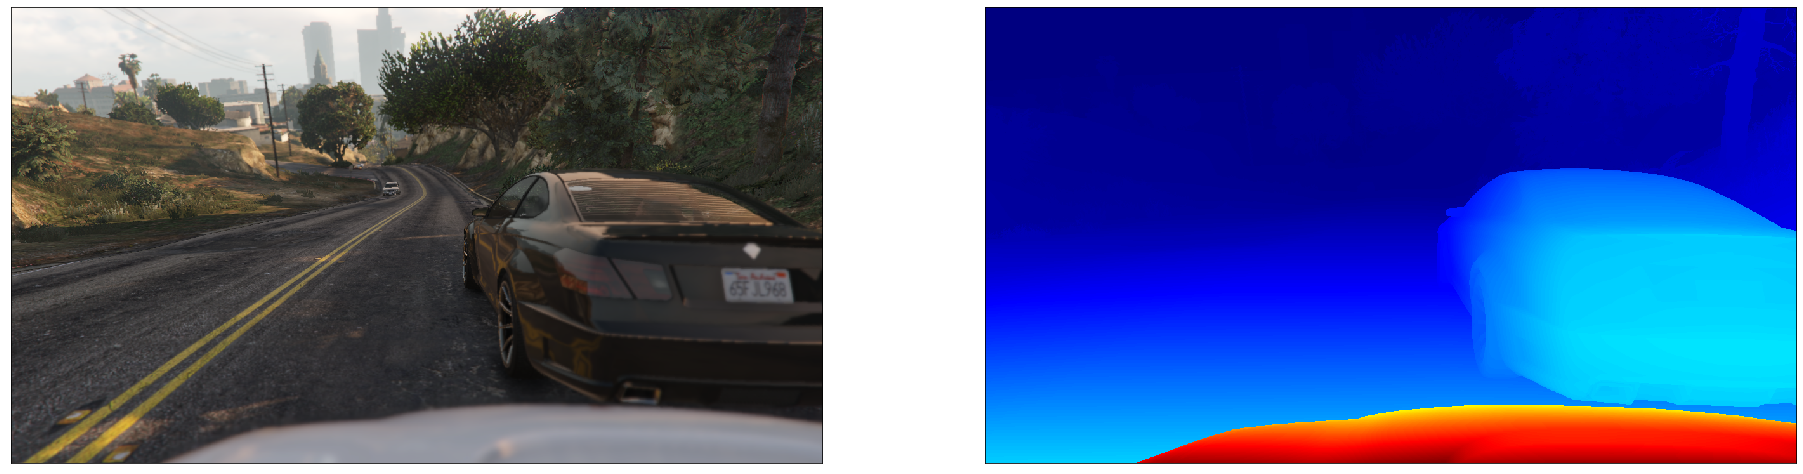

In [4]:
show_array_of_images([x for y in zip(train_images, train_labels) for x in y], image_array_shape=(3,4), depthmap=True)
show_array_of_images([test_image, test_labels], image_array_shape=(1,2), depthmap=True)

# Linear Fit

In [549]:
initial_linear_weights = np.full((60,34),1e-4)

In [550]:
linear = Laplacian(initial_weights_with_squares, partial(create_local_feature_vector, squares=True))

In [551]:
linear.train(train_images, train_labels, prep=None)

In [552]:
linear_prediction = linear.predict(test_image, function=linear.linear_function)

In [553]:
linear_prediction.shape

(720, 1280)

In [554]:
linear_prediction

array([[ 1.        ,  1.        ,  1.        , ...,  0.91161788,
         0.987027  ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  0.11560662,
         0.17103786,  0.32913708],
       [ 0.85242646,  0.85242646,  0.85242646, ..., -0.0926223 ,
        -0.00538766, -0.71664026],
       ...,
       [ 0.71474486,  0.69572643,  0.78183532, ...,  0.6632478 ,
         0.66749255,  0.65084746],
       [ 0.76848349,  0.68826511,  0.71186326, ...,  0.72506728,
         0.73180511,  0.65556239],
       [ 0.7042291 ,  0.71788651,  0.65118035, ...,  0.68498985,
         0.7180854 ,  0.68572787]])

In [555]:
linear.weights

array([[-1.18037978e-01,  2.76063876e-02, -1.24967404e-02, ...,
         1.73290083e+00,  1.82333396e-01,  4.63926512e-02],
       [-1.97832990e-01, -3.52734045e-02,  1.50883973e-01, ...,
         6.30870259e-01,  1.31641969e-01,  4.62233203e-02],
       [-3.47777189e-01, -6.41437155e-02,  1.33385747e-01, ...,
         2.68875937e-01,  9.02995708e-02, -1.71773957e-02],
       ...,
       [ 1.59276714e-02, -1.28719555e-02,  6.84572588e-02, ...,
        -2.10766316e+00, -8.83970891e-01, -2.16028779e+00],
       [-3.70543778e-03, -2.64420822e-02,  4.80151339e-02, ...,
        -4.75955389e-01, -3.44364942e+00, -2.42196847e+00],
       [-4.40583678e-02, -2.71143975e-03,  9.04394218e-02, ...,
        -8.00002886e-01, -5.37639242e+00, -2.62907937e+00]])

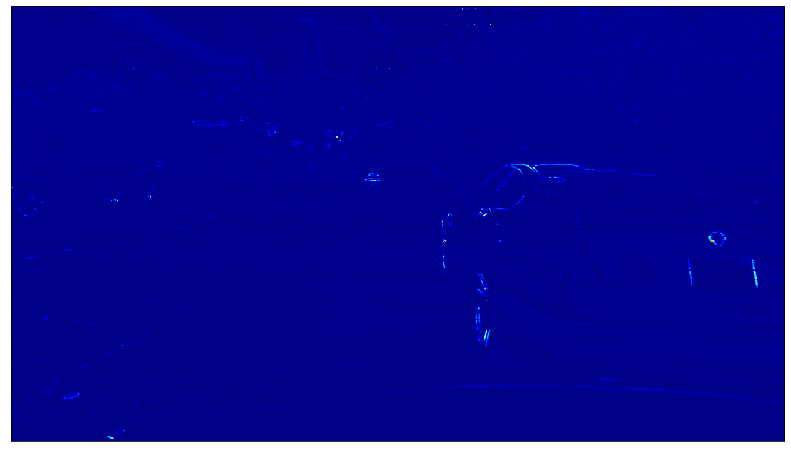

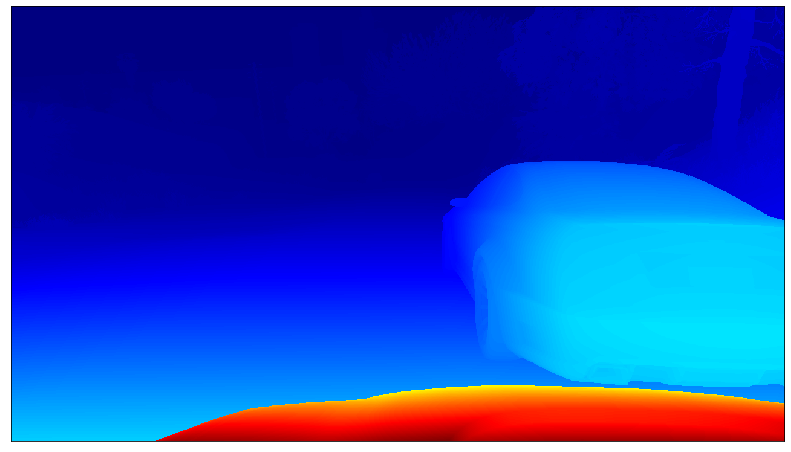

In [556]:
show_img(linear_prediction, depthmap=True)
show_img(cv2.normalize(test_labels, None, 0, 1, 32), depthmap=True)

In [557]:
np.sum(np.sqrt((linear_prediction - test_labels)**2))

613900.9557647665

# Exponential Fit

In [622]:
initial_exponential_weights = np.full((60, 17), 1e-5)

In [623]:
def prep(image):
    image = cv2.normalize(image, None, 0, 1, cv2.NORM_MINMAX)
    return np.log(image)

In [624]:
exponential = Laplacian(initial_exponential_weights, partial(create_local_feature_vector, squares=False))

In [625]:
exponential.train(train_images, train_labels)

In [626]:
exponential_prediction = exponential.predict(test_image)

In [627]:
exponential_prediction.shape

(720, 1280)

In [628]:
np.max(exponential.weights)

0.08721310309045567

In [629]:
np.max(exponential_prediction)
np.max(test_labels)

1.0

1.0

In [630]:
exponential_prediction

array([[1.        , 1.        , 1.        , ..., 0.99992165, 0.99996614,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.93441509, 0.89431495, 0.93539806, ..., 0.8949871 , 0.89687486,
        0.88752199],
       [0.92943345, 0.88579299, 0.88537052, ..., 0.90526259, 0.90430454,
        0.88253565],
       [0.90795355, 0.89306922, 0.87187876, ..., 0.88730336, 0.90495598,
        0.89234341]])

In [631]:
cv2.normalize(test_labels, None, 0, 1, cv2.NORM_MINMAX)

array([[1.        , 1.        , 1.        , ..., 0.93123543, 0.9311952 ,
        0.9338683 ],
       [1.        , 1.        , 1.        , ..., 0.97160625, 0.9717287 ,
        0.9338789 ],
       [1.        , 1.        , 1.        , ..., 0.97162306, 0.9717389 ,
        0.9338891 ],
       ...,
       [0.67645913, 0.67645466, 0.6764507 , ..., 0.05998932, 0.06017719,
        0.06037965],
       [0.67570674, 0.67570233, 0.67569786, ..., 0.05577784, 0.05596572,
        0.05615404],
       [0.6749539 , 0.67494994, 0.67494553, ..., 0.05156637, 0.05175424,
        0.05194256]], dtype=float32)

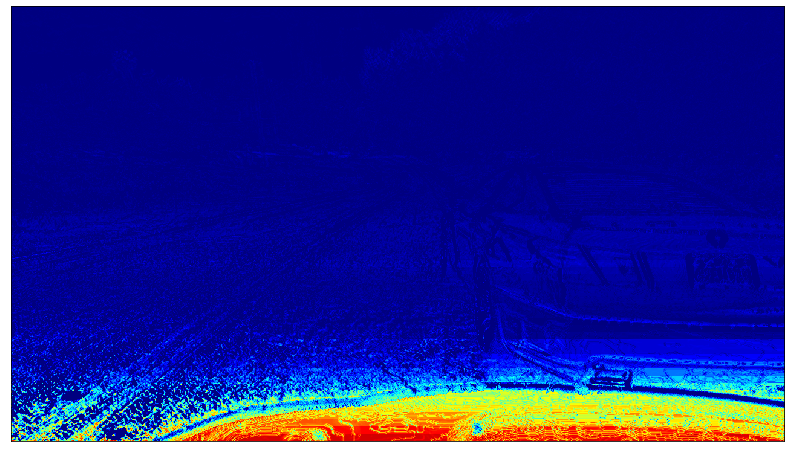

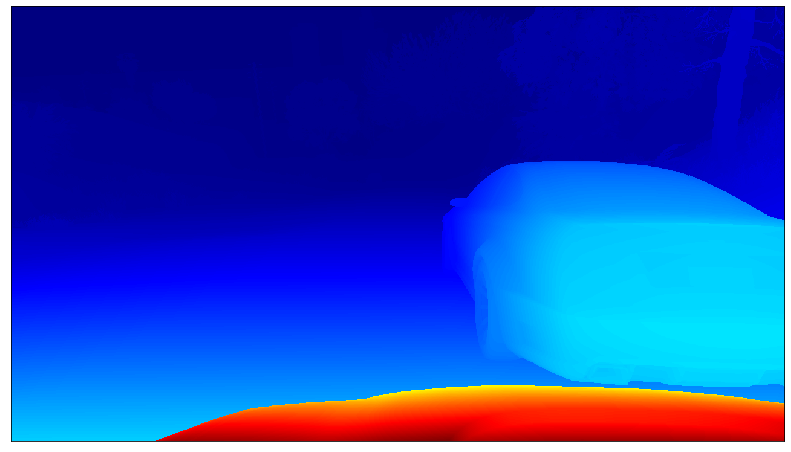

In [632]:
show_img(exponential_prediction, depthmap=True)
show_img(test_labels, depthmap=True)

In [621]:
np.sum(np.sqrt((exponential_prediction - test_labels)**2))

13314.299917916975